In [447]:
import pandas as pd

In [448]:
import pyarrow

In [449]:
df = pd.read_parquet("results.parquet")

In [450]:
df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


In [451]:
df.columns = ["year","type","discipline","event","as","athlete_id","noc","team","place","tied","medal"]

In [452]:
df.head(3)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [454]:
df.isnull().sum()

year            2601
type            2601
discipline         1
event              0
as                 0
athlete_id         0
noc                1
team          186694
place          25215
tied               0
medal         264269
dtype: int64

In [455]:
df["year"] = df['year'].fillna(df['year'].median())

In [456]:
df["type"] = df["type"].fillna(df["type"].mode()[0])

In [457]:
df['discipline'] = df['discipline'].fillna(mode_value[0])

In [458]:
df['noc'] = df['noc'].fillna(df['noc'].mode()[0])

In [459]:
df['team'] = df['team'].fillna('Unknown')

In [460]:
df['place'] = df['place'].fillna(df['place'].median())

In [461]:
df['medal'] = df['medal'].fillna('No Medal')

In [462]:
df.isnull().sum()

year          0
type          0
discipline    0
event         0
as            0
athlete_id    0
noc           0
team          0
place         0
tied          0
medal         0
dtype: int64

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        308408 non-null  float64
 1   type        308408 non-null  object 
 2   discipline  308408 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308408 non-null  object 
 7   team        308408 non-null  object 
 8   place       308408 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       308408 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [464]:
df["year"] = df["year"].astype(int)

In [465]:
df["place"] = df["place"].astype(int)

In [466]:
df["tied"] = df["tied"].astype(int)

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        308408 non-null  int32 
 1   type        308408 non-null  object
 2   discipline  308408 non-null  object
 3   event       308408 non-null  object
 4   as          308408 non-null  object
 5   athlete_id  308408 non-null  int64 
 6   noc         308408 non-null  object
 7   team        308408 non-null  object
 8   place       308408 non-null  int32 
 9   tied        308408 non-null  int32 
 10  medal       308408 non-null  object
dtypes: int32(3), int64(1), object(7)
memory usage: 22.4+ MB


In [468]:
df.head(3)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,Unknown,17,1,No Medal
1,1912,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,9,0,No Medal
2,1920,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,Unknown,32,1,No Medal


In [469]:
df.duplicated().sum()

128

In [470]:
df[df.duplicated()]

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
5759,1932,Summer,Art Competitions,"Painting, Unknown Event, Open (Olympic)",Helen Wills,2744,USA,Unknown,9,0,No Medal
5760,1932,Summer,Art Competitions,"Painting, Unknown Event, Open (Olympic)",Helen Wills,2744,USA,Unknown,9,0,No Medal
5761,1932,Summer,Art Competitions,"Painting, Unknown Event, Open (Olympic)",Helen Wills,2744,USA,Unknown,9,0,No Medal
5762,1932,Summer,Art Competitions,"Painting, Unknown Event, Open (Olympic)",Helen Wills,2744,USA,Unknown,9,0,No Medal
5763,1932,Summer,Art Competitions,"Painting, Unknown Event, Open (Olympic)",Helen Wills,2744,USA,Unknown,9,0,No Medal
...,...,...,...,...,...,...,...,...,...,...,...
189419,1936,Summer,Art Competitions,"Sculpturing, Medals, Open (Olympic)",Willy Kreitz,88615,BEL,Unknown,9,0,No Medal
222211,1904,Summer,Swimming (Aquatics),"Pole Vault, Handicap, Men (Olympic (non-medal))",Gwynne Evans,102422,USA,Unknown,2,0,No Medal
254112,2008,Summer,Fencing,"Épée, Team, Men (Olympic)",Stefano Carozzo,118255,ITA,Italy,3,0,Bronze
254162,1920,Summer,Athletics,"10 kilometres Race Walk, Men (Olympic)",Jan Plichta,118294,TCH,Unknown,9,0,No Medal


In [471]:
df.drop_duplicates(inplace=True)

In [472]:
df.duplicated().sum()

0

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308280 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        308280 non-null  int32 
 1   type        308280 non-null  object
 2   discipline  308280 non-null  object
 3   event       308280 non-null  object
 4   as          308280 non-null  object
 5   athlete_id  308280 non-null  int64 
 6   noc         308280 non-null  object
 7   team        308280 non-null  object
 8   place       308280 non-null  int32 
 9   tied        308280 non-null  int32 
 10  medal       308280 non-null  object
dtypes: int32(3), int64(1), object(7)
memory usage: 24.7+ MB


In [474]:
import matplotlib.pyplot as plt

In [475]:
yearly_participation = df.groupby('year').size()

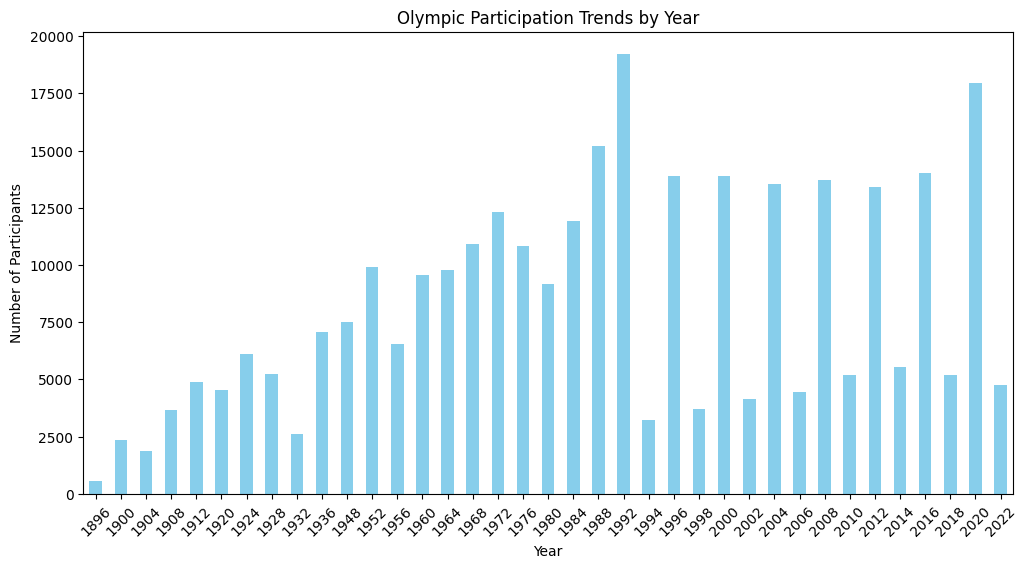

In [476]:
plt.figure(figsize=(12, 6))
yearly_participation.plot(kind='bar', color='skyblue')
plt.title('Olympic Participation Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.show()

In [477]:
medals_by_country = df.groupby('noc')['medal'].value_counts().unstack(fill_value=0)

In [478]:
medals_by_country['total'] = medals_by_country.sum(axis=1)

In [479]:
top_countries = medals_by_country['total'].sort_values(ascending=False).head(10)

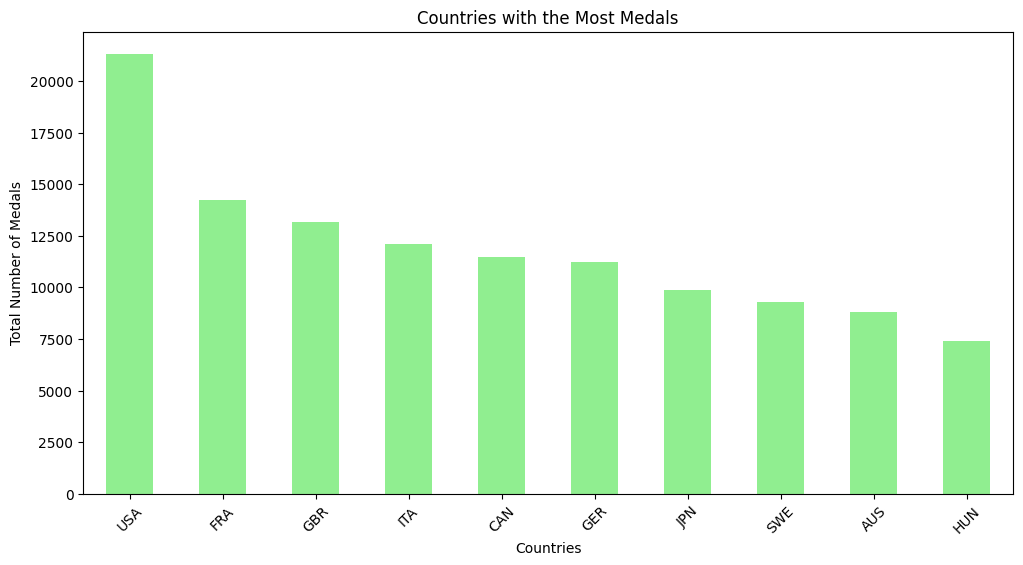

In [480]:
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Countries with the Most Medals')
plt.xlabel('Countries')
plt.ylabel('Total Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [481]:
medals_by_discipline = df.groupby("discipline")["medal"].count()

In [482]:
top_disciplines = medals_by_discipline.sort_values(ascending=False).head(10)

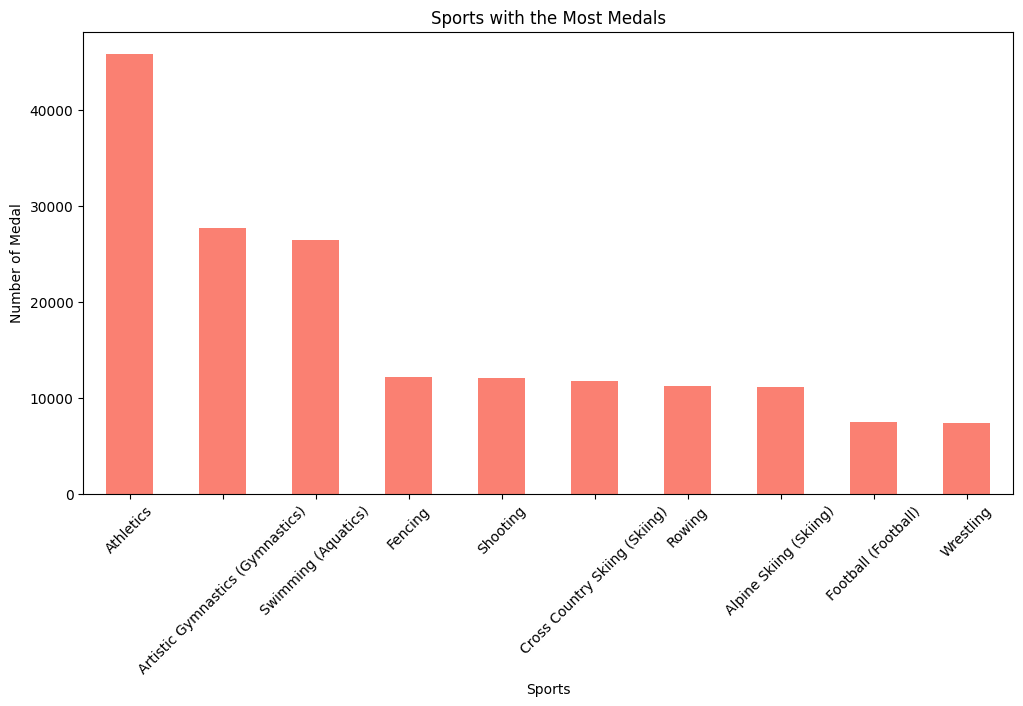

In [483]:
plt.figure(figsize=(12, 6))
top_disciplines.plot(kind='bar', color='salmon')
plt.title('Sports with the Most Medals')
plt.xlabel('Sports')
plt.ylabel('Number of Medal')
plt.xticks(rotation=45)
plt.show()

In [484]:
import seaborn as sns

In [485]:
medals_by_year_country = df.groupby(['year', 'noc'])['medal'].count().unstack(fill_value=0)

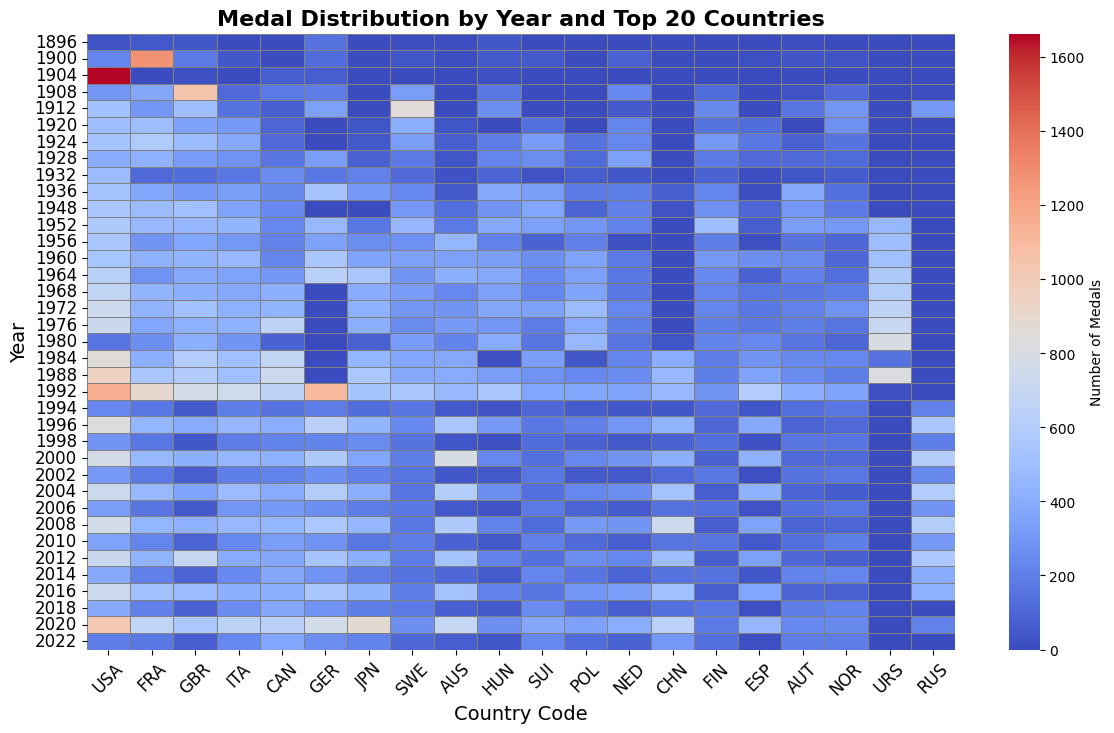

In [486]:
medals_by_year_country = df.groupby(['year', 'noc'])['medal'].count().unstack(fill_value=0)

top_countries = medals_by_year_country.sum().sort_values(ascending=False).head(20).index
medals_filtered = medals_by_year_country[top_countries] 

plt.figure(figsize=(14, 8)) 
sns.heatmap(medals_filtered, cmap='coolwarm', linewidths=0.5, linecolor='gray', 
            cbar_kws={'label': 'Number of Medals'}, xticklabels=True, yticklabels=True)

plt.title('Medal Distribution by Year and Top 20 Countries', fontsize=16, weight='bold')
plt.xlabel('Country Code', fontsize=14)
plt.ylabel('Year', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


In [487]:
top_athletes = df.groupby('athlete_id')['medal'].count().sort_values(ascending=False).head(10)

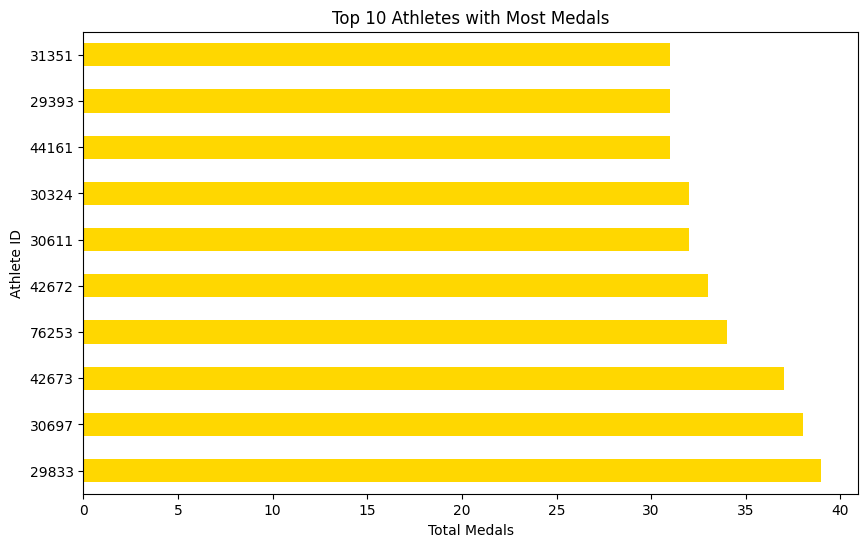

In [488]:
top_athletes.plot(kind='barh', color='gold', figsize=(10, 6))
plt.xlabel('Total Medals')
plt.ylabel('Athlete ID')
plt.title('Top 10 Athletes with Most Medals')
plt.show()